In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host ="localhost",
                            username = "root",
                            password = "Arya@1012",
                            database = "ecommerce")
cur = db.cursor()

#  List all unique cities where customers are located.

In [4]:
query = """select distinct(customer_city) from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [5]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are : ",data[0][0]

('Total orders placed in 2017 are : ', 45101)

# Find the total sales per category.

In [6]:
query = """ select products.product_category as category,
round(sum(payments.payment_value),2) as sales 
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category","Sales"],index=range(1,len(data)+1))

df

,Category,Sales
1,perfumery,506738.66
2,Furniture Decoration,1430176.39
3,telephony,486882.05
4,bed table bath,1712553.67
5,automotive,852294.33
...,...,...
70,cds music dvds,1199.43
71,La Cuisine,2913.53
72,Fashion Children's Clothing,785.67
73,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [7]:
query = """ select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments
"""

cur.execute(query)

data = cur.fetchall()
percentage = data[0][0]
print("the percentage of orders that were paid in installments is : ",percentage,"%")

the percentage of orders that were paid in installments is :  99.9981 %


# Count the number of customers from each state.

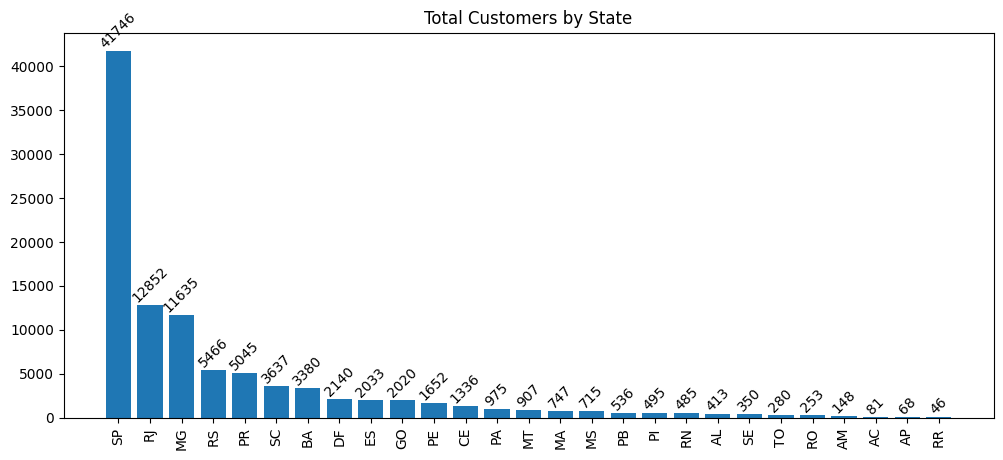

In [42]:
query = """ SELECT customer_state, COUNT(customer_id) AS total_customers
FROM customers
GROUP BY customer_state
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["State", "Total Customers"])

df = df.sort_values(by = "Total Customers",ascending= False)
plt.figure(figsize= (12,5))


bars = plt.bar(df["State"], df["Total Customers"])
plt.title("Total Customers by State")

plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom',rotation = 45)

plt.show()


# Calculate the number of orders per month in 2018.

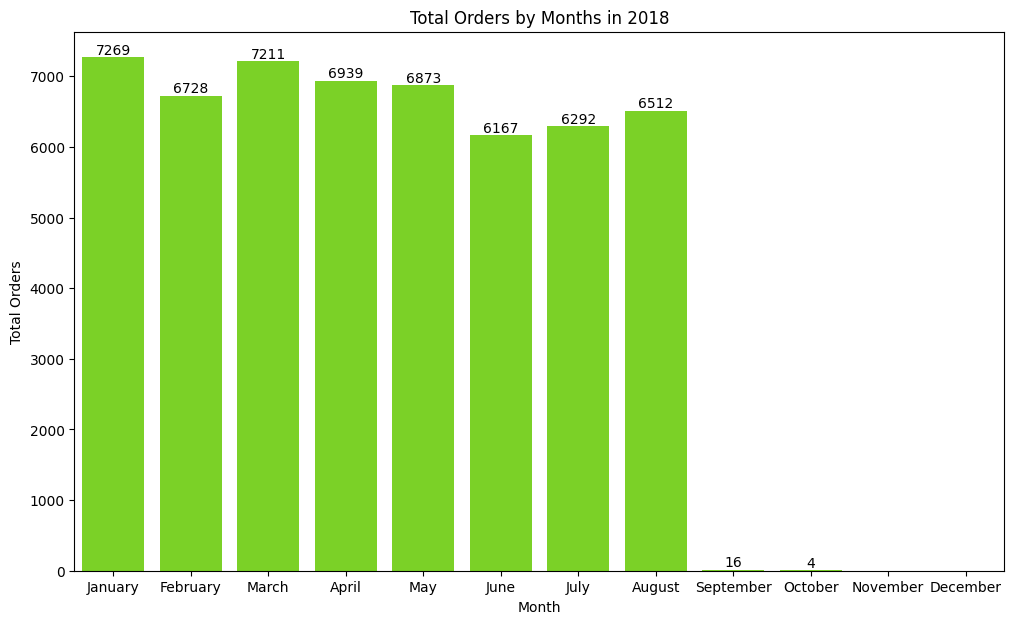

In [114]:
query = """select monthname(order_purchase_timestamp)as months,
count(order_id) as Total_orders from orders
where year(order_purchase_timestamp) = 2018
group by months 
order by monthname(order_purchase_timestamp)
"""
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["Month","Total Orders"])

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,7))

ax = sns.barplot(x= "Month",y="Total Orders",data=df,order= month_order ,color= "#7bed0b")
ax.bar_label(ax.containers[0])

plt.title("Total Orders by Months in 2018")

plt.show()


# Find the average number of products per order, grouped by customer city.

In [56]:
query = """with count_per_order as 
(select orders.customer_id,orders.order_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) as Average_Orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=["City","Average Orders"],index = range(1,len(data)+1))
df

,City,Average Orders
1,sao paulo,1.16
2,sao jose dos campos,1.14
3,porto alegre,1.17
4,indaial,1.12
5,treze tilias,1.27
...,...,...
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,buriti,3.00
4109,morro agudo de goias,1.00


# Calculate the percentage of total revenue contributed by each product category.

In [64]:
query = """select upper(products.product_category) as category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as Sales_Percentage 
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category
order by Sales_Percentage desc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=["Product Category","Percentage Distribution"],index = range(1,len(data)+1))
df


,Product Category,Percentage Distribution
1,BED TABLE BATH,10.70
2,HEALTH BEAUTY,10.35
3,COMPUTER ACCESSORIES,9.90
4,FURNITURE DECORATION,8.93
5,WATCHES PRESENT,8.93
...,...,...
70,HOUSE COMFORT 2,0.01
71,CDS MUSIC DVDS,0.01
72,PC GAMER,0.01
73,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [72]:
query = """select p.product_category,count(oi.product_id),
round(avg(oi.price),2)
from products p join order_items oi
on p.product_id = oi.product_id
group by p.product_category"""

cur.execute(query)

data  = cur.fetchall()

df = pd.DataFrame(data,columns=["Category","Order_Count","Price"],index=range(1,len(data)+1))

arr1 = df["Order_Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])
print("The correlation b/w product price and the number of times a product has been purchased is",round(a[0][1],2))

The correlation b/w product price and the number of times a product has been purchased is -0.11


#  Calculate the total revenue generated by each seller, and rank them by revenue.


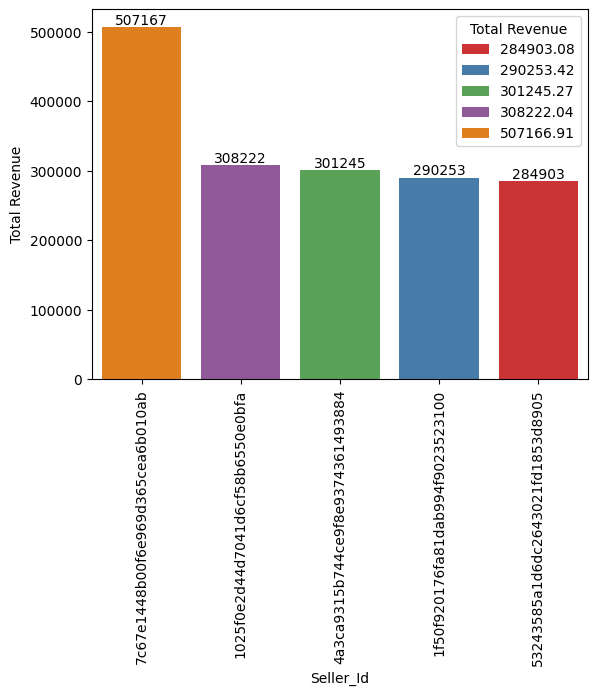

In [167]:
query = """select * ,dense_rank() over(order by Total_Revenue desc) as rn from
(select oi.seller_id,round(sum(pay.payment_value),2) as Total_Revenue
from order_items oi join payments pay
on oi.order_id = pay.order_id
group by oi.seller_id) as a """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["Seller_Id","Total Revenue","Rank"])

df =df.head()
ax = sns.barplot(x= "Seller_Id",y ="Total Revenue",data = df,hue="Total Revenue",palette="Set1")
plt.xticks(rotation =90)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [117]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["Customer ID","Order_Purchase_Timestamp","Payment","Moving_Avg"],index = range(1,len(data)+1))
df

,Customer ID,Order_Purchase_Timestamp,Payment,Moving_Avg
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
4,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
5,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103882,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103883,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103884,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103885,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

In [125]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["Year","Month","Sale over Month","Cummulative Sale"],index=range(1,len(data)+1))
df


,Year,Month,Sale over Month,Cummulative Sale
1,2016,9,252.24,252.24
2,2016,10,59090.48,59342.72
3,2016,12,19.62,59362.34
4,2017,1,138488.04,197850.38
5,2017,2,291908.01,489758.39
6,2017,3,449863.60,939621.99
7,2017,4,417788.03,1357410.02
8,2017,5,592918.82,1950328.84
9,2017,6,511276.38,2461605.22
10,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [126]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [127]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

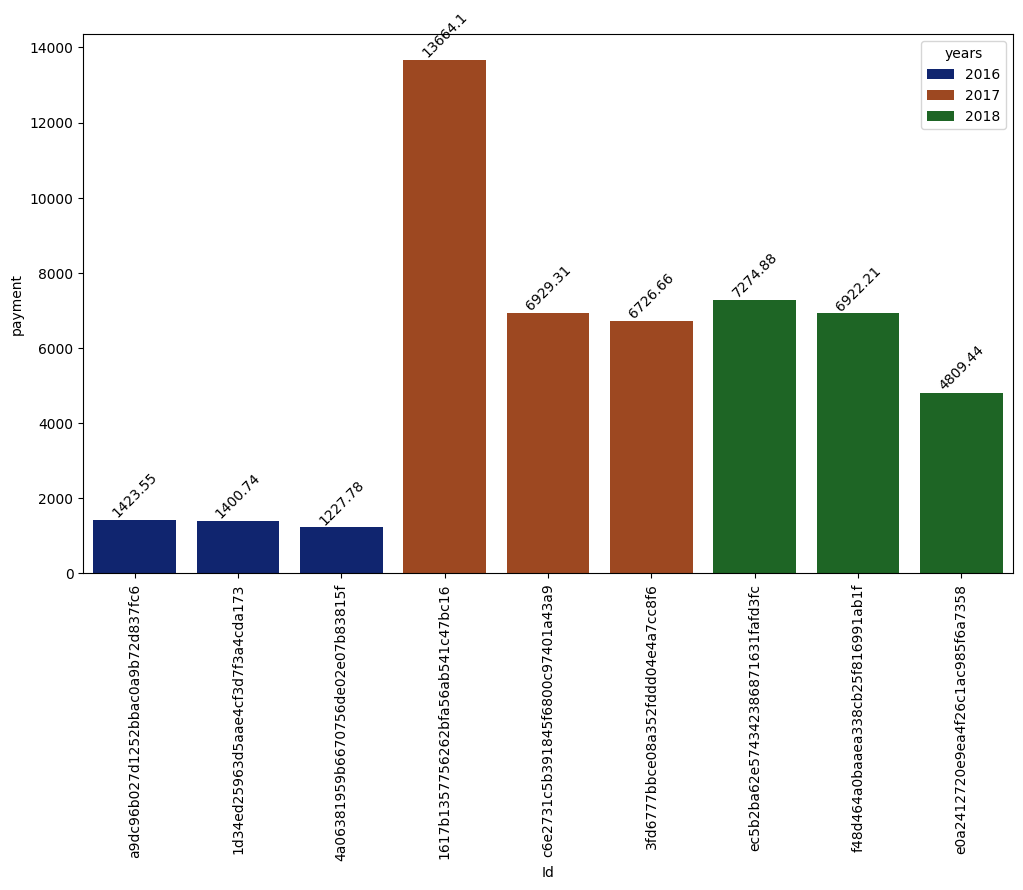

In [166]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
#df = pd.DataFrame(data, columns = ["years","Id","payment","rank"])
plt.figure(figsize=(12,7))
ax = sns.barplot(x = "Id", y = "payment", data = df, hue = "years",palette= "dark")

for container in ax.containers:
    ax.bar_label(container,rotation =45)
plt.xticks(rotation = 90)
plt.show()